In [2]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd

In [3]:
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

In [4]:
sim1 = '/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096'
sim2 = '/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096'
sim3 = '/home/akinshol/Data/Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096'
sim4 = '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096'

# here is where we will put whatever halo numbers we decide are interesting and worth computing
# i.e. all the halos with stars in them

nums1 = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 45, 46, 48, 55, 57, 58, 60, 64, 71, 73, 77, 80, 91, 94, 95, 99, 106, 115, 121, 125, 126, 131, 140, 143, 160, 223, 252, 264, 271, 304, 353, 372, 373, 435, 465, 590, 647, 677, 682, 738, 869, 961, 980, 1146, 1155, 1381, 2792, 4897, 10814]
nums2 = [1, 2, 3, 4, 7, 14, 16, 17, 18, 19, 21, 22, 25, 27, 28, 29, 30, 33, 36, 41, 50, 51, 52, 56, 60, 62, 70, 73, 75, 95, 104, 108, 134, 203, 277, 553, 982, 1319, 1409, 1481, 4380, 5722]
nums3 = [1, 4, 9, 10, 11, 12, 19, 24, 29, 30, 33, 36, 39, 40, 45, 46, 48, 53, 57, 62, 66, 69, 70, 72, 75, 76, 85, 89, 102, 133, 152, 185, 211, 302, 425, 457, 536, 1773, 2748, 2891, 9059, 9126, 10085, 11901]
nums4 = [1, 8, 9, 13, 14, 19, 25, 31, 32, 40, 47, 63, 92, 99, 126, 129, 135, 170, 195, 444, 686, 942, 1418]


In [5]:
data1 = []

with open(sim1 + '.data', 'rb') as f:
    while True:
        try:
            data1.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data1 = pd.DataFrame(data1)
    
    
data2 = []
    
with open(sim2 + '.data', 'rb') as f:
    while True:
        try:
            data2.append(pickle.load(f))
        except EOFError:
            break
        
    data2 = pd.DataFrame(data2)
    
    
data3 = []
    
with open(sim3 + '.data', 'rb') as f:
    while True:
        try:
            data3.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data3 = pd.DataFrame(data3)
    
    
data4 = []
    
with open(sim4 + '.data', 'rb') as f:
    while True:
        try:
            data4.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data4 = pd.DataFrame(data4)

In [6]:
data = data1.append(data2)
data = data.append(data3)
data = data.append(data4)

In [6]:
data.keys()

Index(['B-V', 'B_mag', 'HIgasfrac', 'I_mag', 'Lx', 'Ly', 'Lz', 'M_gas',
       'M_star', 'R_mag', 'Rmax', 'Rvir', 'SFR', 'U_mag', 'V90/Vdisp', 'V_mag',
       'Xc', 'Yc', 'Zc', 'age', 'b_axis', 'c/a', 'c_axis', 'fMhires', 'feh',
       'gasfrac', 'h1dist', 'haloid', 'hostHalo', 'id2', 'mHI', 'mass',
       'n_gas', 'n_particles', 'n_star', 'ovdens', 'sSFR', 'sfh', 'sfhbins',
       'zgas', 'zstar'],
      dtype='object')

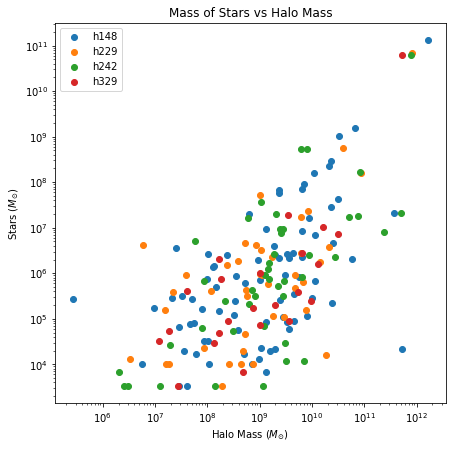

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['M_star'], label='h148')
plt.scatter(data2['mass'], data2['M_star'], label='h229')
plt.scatter(data3['mass'], data3['M_star'], label='h242')
plt.scatter(data4['mass'], data4['M_star'], label='h329')
plt.loglog()
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel(r'Stars ($M_{\odot}$)')
plt.title('Mass of Stars vs Halo Mass')
plt.legend()plt.scatter(data3['M_star'][data3['haloid']==53], data3['Rvir'][data3['haloid']==53], label='H53')
plt.savefig('Mass of Stars vs Halo Mass')
plt.show()

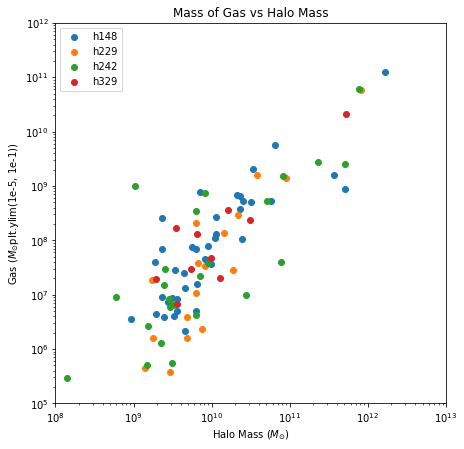

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['M_gas'], label='h148')
plt.scatter(data2['mass'], data2['M_gas'], label='h229')
plt.scatter(data3['mass'], data3['M_gas'], label='h242')
plt.scatter(data4['mass'], data4['M_gas'], label='h329')
plt.loglog()
plt.legend()
plt.ylim(1e5, 1e12)
plt.xlim(1e8, 1e13)
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel(r'Gas ($M_{\odot}$plt.ylim(1e-5, 1e-1))')
plt.title('Mass of Gas vs Halo Mass')
plt.savefig('Mass of Gas vs Halo Mass')
plt.show()

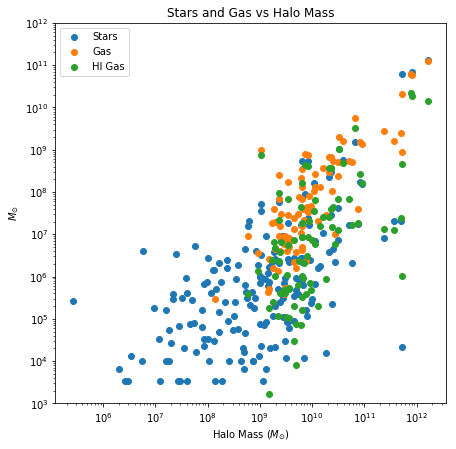

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(data['mass'], data['M_star'], label='Stars')
plt.scatter(data['mass'], data['M_gas'], label='Gas')
plt.scatter(data['mass'], data['mHI'], label='HI Gas')
plt.loglog()
plt.ylim(1e3, 1e12)
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel(r'$M_{\odot}$')
plt.title('Stars and Gas vs Halo Mass')
plt.legend()
plt.savefig('Stars and Gas vs Halo Mass')
plt.show()

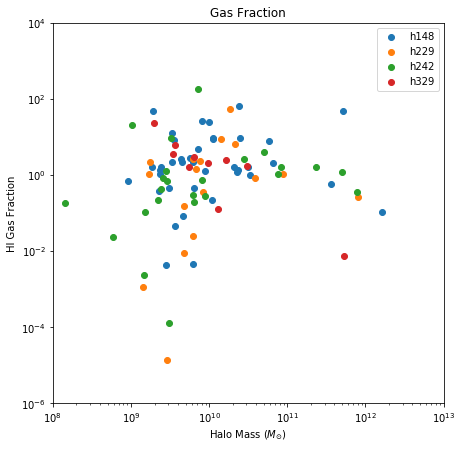

In [10]:
plt.scatter(data['SFR'], abs(data['G_flow_2.5']), c='b', label='Inflow')
plt.scatter(data['SFR'], data['G_flow_2.5'], c='r', label='Outflow')
#plt.scatter(abs(data2['G_flow_2.5']), data2['sSFR'], c='b')
#plt.scatter((data2['G_flow_2.5']), data2['sSFR'], c='r')

plt.loglog()
plt.ylim(1e-5, 1e2)
plt.xlim(1e-6, 1e2)

#plt.legend()
plt.ylabel('Gas flow')
plt.xlabel('SFR')
plt.title('Gas flow vs sSFR')plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['HIgasfrac'], label='h148')
plt.scatter(data2['mass'], data2['HIgasfrac'], label='h229')
plt.scatter(data3['mass'], data3['HIgasfrac'], label='h242')
plt.scatter(data4['mass'], data4['HIgasfrac'], label='h329')
plt.loglog()
plt.xlim(1e8,1e13)
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel('HI Gas Fraction')
plt.ylim(1e-6, 1e4)
plt.title('Gas Fraction')
plt.legend()
plt.savefig('Gas Fraction')
plt.show()

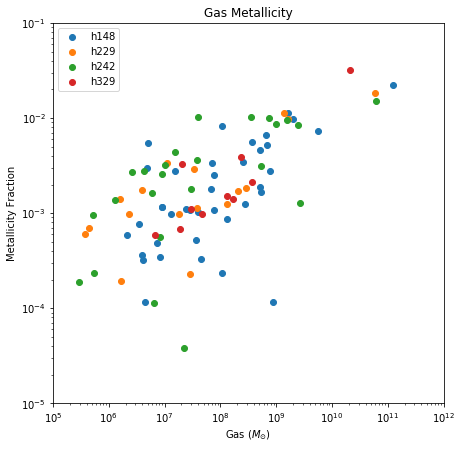

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(data1['M_gas'], data1['zgas'], label='h148')
plt.scatter(data2['M_gas'], data2['zgas'], label='h229')
plt.scatter(data3['M_gas'], data3['zgas'], label='h242')
plt.scatter(data4['M_gas'], data4['zgas'], label='h329')
plt.loglog()
plt.legend()
plt.ylim(1e-5, 1e-1)
plt.xlim(1e5, 1e12)
plt.xlabel(r'Gas ($M_{\odot}$)')
plt.ylabel('Metallicity Fraction')
plt.title('Gas Metallicity')
plt.savefig('Gas Metallicity')
plt.show()

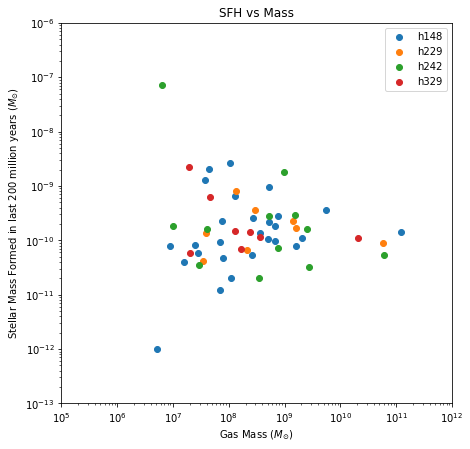

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(data1['M_gas'], data1['sSFR'], label='h148')
plt.scatter(data2['M_gas'], data2['sSFR'], label='h229')
plt.scatter(data3['M_gas'], data3['sSFR'], label='h242')
plt.scatter(data4['M_gas'], data4['sSFR'], label='h329')
plt.loglog()
plt.legend()
plt.ylim (1e-13, 1e-6)
plt.xlim (1e5, 1e12)
plt.xlabel (r'Gas Mass ($M_{\odot}$)')
plt.ylabel (r'Stellar Mass Formed in last 200 million years ($M_{\odot}$)')
plt.title ('SFH vs Mass')
plt.savefig('SFH vs Mass')
plt.show()

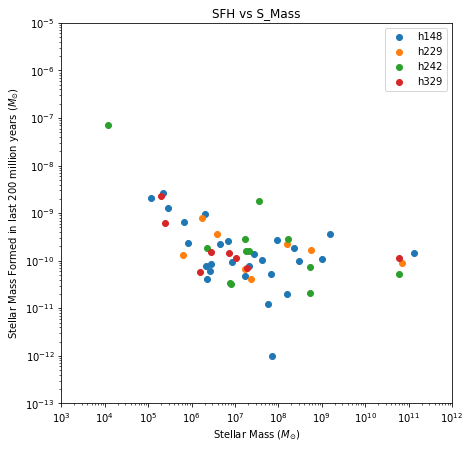

In [32]:
plt.figure(figsize=(7,7))
plt.scatter(data1['M_star'], data1['sSFR'], label='h148')
plt.scatter(data2['M_star'], data2['sSFR'], label='h229')
plt.scatter(data3['M_star'], data3['sSFR'], label='h242')
plt.scatter(data4['M_star'], data4['sSFR'], label='h329')
plt.loglog()
plt.legend()
plt.ylim (1e-13, 1e-5)
plt.xlim (1e3, 1e12)
plt.xlabel (r'Stellar Mass ($M_{\odot}$)')
plt.ylabel (r'Stellar Mass Formed in last 200 million years ($M_{\odot}$)')
plt.title ('SFH vs S_Mass')
plt.savefig('SFH vs S_Mass')
plt.show()

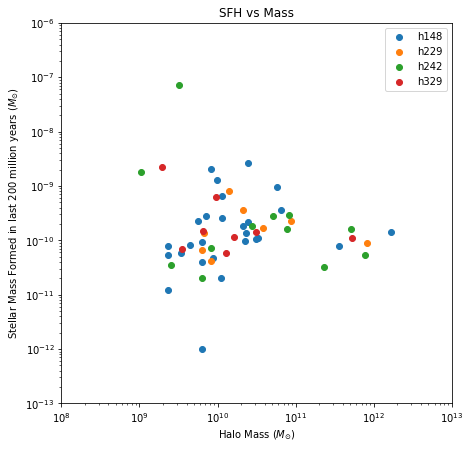

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['sSFR'], label='h148')
plt.scatter(data2['mass'], data2['sSFR'], label='h229')
plt.scatter(data3['mass'], data3['sSFR'], label='h242')
plt.scatter(data4['mass'], data4['sSFR'], label='h329')
plt.loglog()
plt.legend()
plt.ylim (1e-13, 1e-6)
plt.xlim (1e8, 1e13)
plt.xlabel (r'Halo Mass ($M_{\odot}$)')
plt.ylabel (r'Stellar Mass Formed in last 200 million years ($M_{\odot}$)')
plt.title ('SFH vs Mass')
plt.savefig('SFH vs Mass')
plt.show()

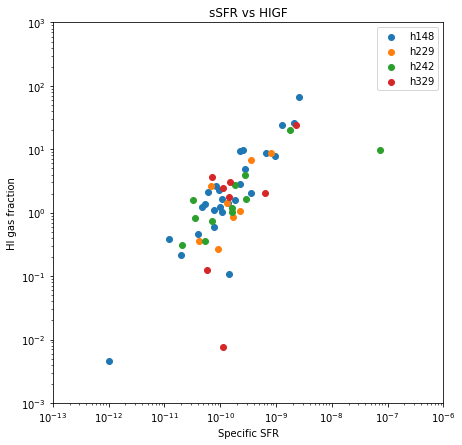

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(data1['sSFR'], data1['HIgasfrac'], label='h148')
plt.scatter(data2['sSFR'], data2['HIgasfrac'], label='h229')
plt.scatter(data3['sSFR'], data3['HIgasfrac'], label='h242')
plt.scatter(data4['sSFR'], data4['HIgasfrac'], label='h329')
plt.loglog()
plt.legend()
plt.ylim (1e-3, 1e3)
plt.xlim (1e-13, 1e-6)
plt.xlabel (r'Specific SFR')
plt.ylabel (r'HI gas fraction')
plt.title ('sSFR vs HIGF')
plt.savefig('sSFR vs HIGF')
plt.show()

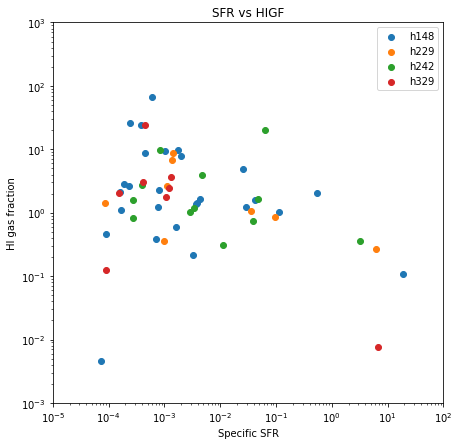

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(data1['SFR'], data1['HIgasfrac'], label='h148')
plt.scatter(data2['SFR'], data2['HIgasfrac'], label='h229')
plt.scatter(data3['SFR'], data3['HIgasfrac'], label='h242')
plt.scatter(data4['SFR'], data4['HIgasfrac'], label='h329')
plt.loglog()
plt.legend()
plt.ylim (1e-3, 1e3)
plt.xlim (1e-5, 1e2)
plt.xlabel (r'Specific SFR')
plt.ylabel (r'HI gas fraction')
plt.title ('SFR vs HIGF')
plt.savefig('SFR vs HIGF')
plt.show()

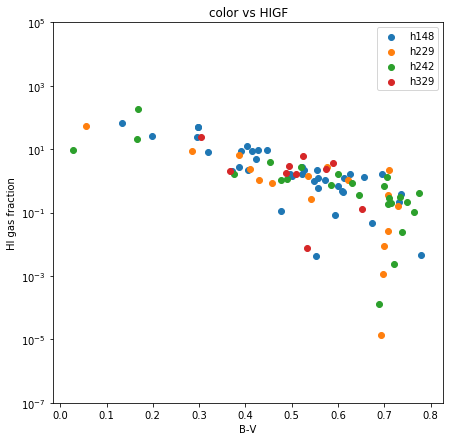

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(data1['B-V'], data1['HIgasfrac'], label='h148')
plt.scatter(data2['B-V'], data2['HIgasfrac'], label='h229')
plt.scatter(data3['B-V'], data3['HIgasfrac'], label='h242')
plt.scatter(data4['B-V'], data4['HIgasfrac'], label='h329')
plt.semilogy()
plt.legend()
plt.ylim (1e-7, 1e5)
plt.xlabel (r'B-V')
plt.ylabel (r'HI gas fraction')
plt.title ('color vs HIGF')
plt.savefig('color vs HIGF')
plt.show()

In [30]:
print(data1['HIgasfrac'][data1['haloid']==95])
print(data1['B-V'][data1['haloid']==95])

45    0.004309693225680282
Name: HIgasfrac, dtype: object
45    0.55348
Name: B-V, dtype: float64


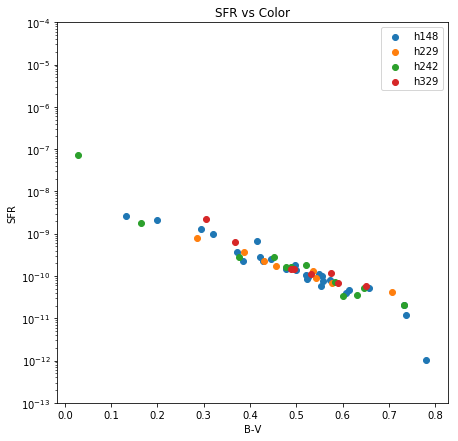

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(data1['B-V'], data1['sSFR'], label='h148')
plt.scatter(data2['B-V'], data2['sSFR'], label='h229')
plt.scatter(data3['B-V'], data3['sSFR'], label='h242')
plt.scatter(data4['B-V'], data4['sSFR'], label='h329')
plt.semilogy()
plt.legend()
plt.ylim (1e-13, 1e-4)
plt.xlabel (r'B-V')
plt.ylabel (r'SFR')
plt.title ('SFR vs Color')
plt.savefig('SFR vs Color')
plt.show()

# Outliers

In [49]:
s1 = pynbody.load(sim1)
h1 = s1.halos()
s1.physical_units()

In [63]:
# Halo 17, h148

halo17 = h1.load_copy(17)
#pynbody.analysis.angmom.sideon(halo17)
halo17.physical_units()

#pynbody.plot.stars.render(halo17, width='15 kpc')
#plt.savefig('Halo 17', dpi=300)
#plt.show()

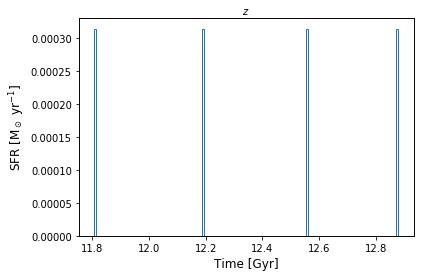

In [69]:
pynbody.plot.stars.sfh(halo17, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('Halo 17, SFH')

plt.show()

In [64]:
print(data1['n_star'][data1['haloid'] == 17])
print(data1['n_gas'][data1['haloid'] == 17])
print(len(halo17.dm))

12    6
Name: n_star, dtype: int64
12    49187
Name: n_gas, dtype: int64
110254


In [13]:
# Halo 10814, h148

halo10814 = h1.load_copy(10814)
#pynbody.analysis.angmom.sideon(halo17)
halo10814.physical_units()

#pynbody.plot.stars.render(halo17, width='15 kpc')
#plt.savefig('Halo 17', dpi=300)
#plt.show()

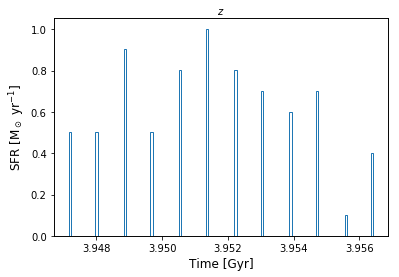

In [15]:
pynbody.plot.stars.sfh(halo10814, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('Halo 10814, SFH')

plt.show()

In [27]:
# Halo 647

halo647 = h1.load_copy(647)
#pynbody.analysis.angmom.sideon(halo647)
halo647.physical_units()

#pynbody.plot.stars.render(halo647, width='15 kpc')
#plt.savefig('Halo 647', dpi=300)
#plt.show()

#Smoothing particles exceeds tree particles

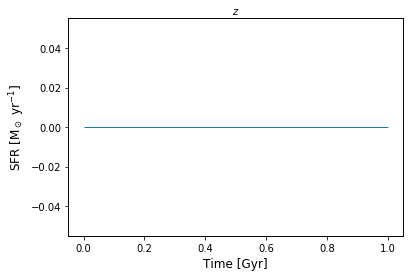

In [70]:
pynbody.plot.stars.sfh(halo647, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=100)

plt.savefig('Halo 647, SFH')

plt.show()

#zero size array to reduction min with no identity

In [26]:
print(data1['n_star'][data1['haloid'] == 647])
print(data1['n_gas'][data1['haloid'] == 647])
print(len(halo647))

67    2
Name: n_star, dtype: int64
67    0
Name: n_gas, dtype: int64
1893


In [50]:
s2 = pynbody.load(sim2)
h2 = s2.halos()
s2.physical_units()

In [32]:
# Halo 33, h229

halo33 = h2.load_copy(33)
#pynbody.analysis.angmom.sideon(halo33)
halo33.physical_units()

#pynbody.plot.stars.render(halo33, width='15 kpc')
#plt.savefig('Halo 33', dpi=300)
#plt.show()

#Smoothing particles exceeds tree particles

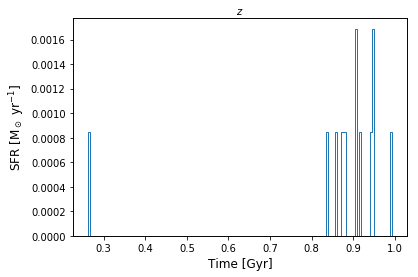

In [71]:
pynbody.plot.stars.sfh(halo33, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('Halo 33, SFH')

#plt.semilogy()
#plt.ylim(1e-14, 1e-1)

plt.show()

In [31]:
print(data2['n_star'][data2['haloid'] == 33])
print(data2['n_gas'][data2['haloid'] == 33])
print(len(halo33))

17    14
Name: n_star, dtype: int64
17    0
Name: n_gas, dtype: int64
29179


/home/engelhar/anaconda3/lib/python3.7/site-packages/pynbody/plot/stars.py:74: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


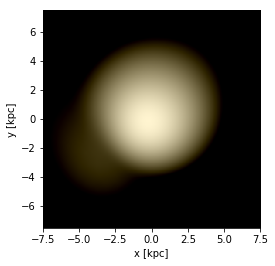

In [33]:
# Halo 41, h229

halo41 = h2.load_copy(41)
halo41.physical_units()

pynbody.analysis.angmom.sideon(halo41)

pynbody.plot.stars.render(halo41, width='15 kpc')
plt.savefig('Halo 41', dpi=300)
plt.show()


#Zero size array to reduction max with no identity


In [35]:
print(data2['n_star'][data2['haloid'] == 41])
print(data2['n_gas'][data2['haloid'] == 41])
print(len(halo41.dm))

19    33
Name: n_star, dtype: int64
19    21
Name: n_gas, dtype: int64
24049


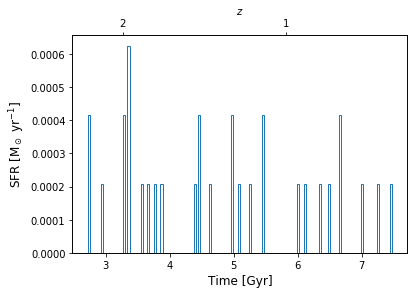

In [72]:
pynbody.plot.stars.sfh(halo41, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('Halo 41, SFH')

plt.show()

#Zero size array to reduction min with no identity

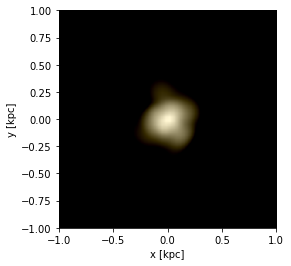

In [36]:
# Halo 4380, h229

halo4380 = h2.load_copy(4380)
pynbody.analysis.angmom.sideon(halo4380)
halo4380.physical_units()

pynbody.plot.stars.render(halo4380, width='2 kpc')
plt.savefig('Halo 4380', dpi=300)
plt.show()

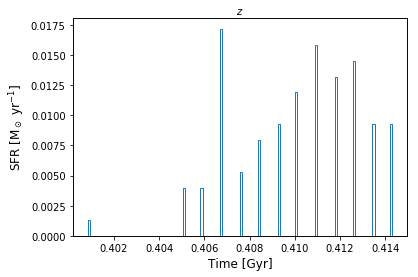

In [73]:
pynbody.plot.stars.sfh(halo4380, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
#plt.semilogy()
#plt.ylim(1e-14, 1e-1)

plt.savefig('Halo 4380, SFH')

plt.show()

In [38]:
print(data2['n_star'][data2['haloid'] == 4380])
print(data2['n_gas'][data2['haloid'] == 4380])
print(len(halo4380.dm))

40    100
Name: n_star, dtype: int64
40    0
Name: n_gas, dtype: int64
62


In [51]:
s3 = pynbody.load(sim3)
h3 = s3.halos()
s3.physical_units()

In [42]:
# Halo 185, h242

halo185 = h3.load_copy(185)
halo185.physical_units()

#pynbody.analysis.angmom.sideon(halo185)

#pynbody.plot.stars.render(halo185, width='2 kpc')
#plt.savefig('Halo 185', dpi=300)
#plt.show()

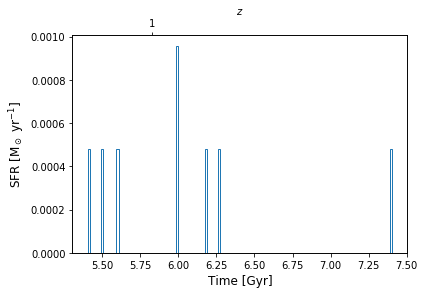

In [74]:
pynbody.plot.stars.sfh(halo185, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
#plt.semilogy()
#plt.ylim(1e-14, 1e-1)

plt.savefig('Halo 185, SFH')

plt.show()

In [45]:
print(data3['n_star'][data3['haloid'] == 185])
print(data3['n_gas'][data3['haloid'] == 185])
print(len(halo185.dm))

31    9
Name: n_star, dtype: int64
31    30
Name: n_gas, dtype: int64
8927


In [47]:
# Halo 2891, h242

halo2891 = h3.load_copy(2891)
#pynbody.analysis.angmom.sideon(halo2891)
halo2891.physical_units()

#pynbody.plot.stars.render(halo2891, width='2 kpc')
#plt.savefig('Halo 2891', dpi=300)
#plt.show()

#zero size to reduction max with no identity

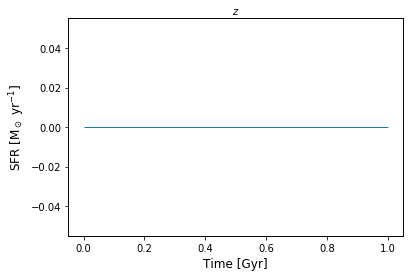

In [75]:
pynbody.plot.stars.sfh(halo2891, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
#plt.semilogy()
#plt.ylim(1e-14, 1e-1)

plt.savefig('Halo 2891, SFH')

plt.show()

#zero size array to reduction min with no identity

In [49]:
print(data3['n_star'][data3['haloid'] == 2891])
print(data3['n_gas'][data3['haloid'] == 2891])
print(len(halo2891.dm))

39    1
Name: n_star, dtype: int64
39    15
Name: n_gas, dtype: int64
396


In [50]:
# Halo 10085, h242

halo10085 = h3.load_copy(10085)
#pynbody.analysis.angmom.sideon(halo10085)
halo10085.physical_units()

#pynbody.plot.stars.render(halo10085, width='2 kpc')
#plt.savefig('Halo 10085', dpi=300)
#plt.show()

#Smoothing particles exceeds tree

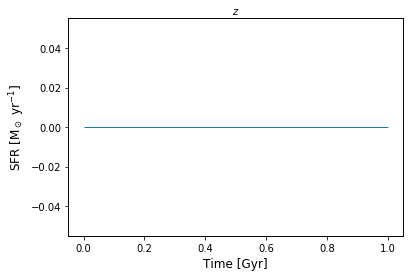

In [76]:
pynbody.plot.stars.sfh(halo10085, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
#plt.semilogy()
#plt.ylim(1e-14, 1e-1)

plt.savefig('Halo 10085, SFH')

plt.show()

In [77]:
print(data3['n_star'][data3['haloid'] == 10085])
print(data3['n_gas'][data3['haloid'] == 10085])
print(len(halo10085.dm))

42    1
Name: n_star, dtype: int64
42    0
Name: n_gas, dtype: int64
90


In [52]:
s4 = pynbody.load(sim4)
h4 = s4.halos()
s4.physical_units()

In [55]:
# Halo 135, h329

halo135 = h4.load_copy(135)
#pynbody.analysis.angmom.sideon(halo135)
halo135.physical_units()

#pynbody.plot.stars.render(halo135, width='2 kpc')
#plt.savefig('Halo 135', dpi=300)
#plt.show()

#Smoothing particles exceeds particles in tree

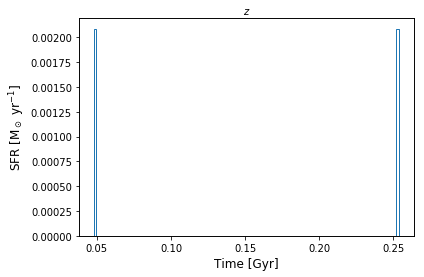

In [78]:
pynbody.plot.stars.sfh(halo135, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
#plt.semilogy()
#plt.ylim(1e-14, 1e-1)

plt.savefig('Halo 135, SFH')

plt.show()

In [57]:
print(data4['n_star'][data4['haloid'] == 135])
print(data4['n_gas'][data4['haloid'] == 135])
print(len(halo135.dm))

16    4
Name: n_star, dtype: int64
16    0
Name: n_gas, dtype: int64
5817


# Host Halos

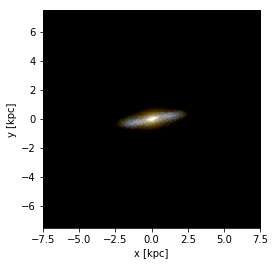

In [165]:
# Halo 1, h329

halo1 = h4.load_copy(1)
pynbody.analysis.angmom.sideon(halo1)
halo1.physical_units()

pynbody.plot.stars.render(halo1, width='15 kpc')
plt.savefig('Halo 1', dpi=300)
plt.show()

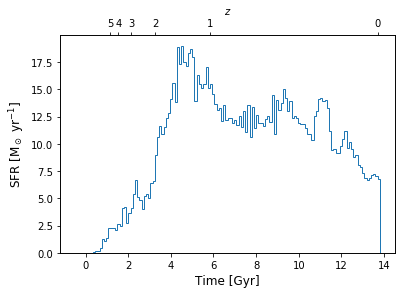

In [80]:
halo1d = h4.load_copy(1)

pynbody.plot.stars.sfh(halo1d, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('Halo 1d, SFH')

plt.show()

In [194]:
print(data4['n_star'][data4['haloid'] == 1])
print(data4['n_gas'][data4['haloid'] == 1])
print(len(halo1.dm))

0    17594142
Name: n_star, dtype: int64
0    1230681
Name: n_gas, dtype: int64
14936390


In [21]:
# Halo 1, h148

halo1a = h1.load_copy(1)
#pynbody.analysis.angmom.sideon(halo1)0    37893901
halo1a.physical_units()
#pynbody.plot.stars.render(halo1, width='15 kpc')
#plt.savefig('Halo 1', dpi=300)
#plt.show()

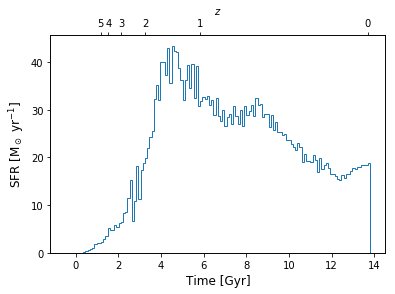

In [7]:
halo1a = h1.load_copy(1)

halo1a.physical_units()

plt.savefig('Halo 1a, SFH')

pynbody.plot.stars.sfh(halo1a, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.show()

In [22]:
print(data1['n_star'][data1['haloid'] == 1])
print(data1['n_gas'][data1['haloid'] == 1])
print(len(halo1a.dm))

0    37893901
Name: n_star, dtype: int64
0    7377385
Name: n_gas, dtype: int64
48425264


In [23]:
# Halo 1, h229

halo1b = h2.load_copy(1)
#pynbody.analysis.angmom.sideon(halo1)
halo1b.physical_units()

#pynbody.plot.stars.render(halo1, width='15 kpc')
#plt.savefig('Halo 1', dpi=300)
#plt.show()

In [ ]:
pynbody.plot.stars.sfh(halo1b, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 1b SFH')

plt.show()

In [24]:
print(data2['n_star'][data2['haloid'] == 1])
print(data2['n_gas'][data2['haloid'] == 1])
print(len(halo1b.dm))

0    20191832
Name: n_star, dtype: int64
0    3722280
Name: n_gas, dtype: int64
23633760


In [25]:
# Halo 1, h242

halo1c = h3.load_copy(1)


In [ ]:
pynbody.analysis.angmom.sideon(halo1)

In [26]:
halo1c.physical_units()

In [ ]:
pynbody.plot.stars.render(halo1, width='15 kpc')
plt.savefig('Halo 1', dpi=300)
plt.show()

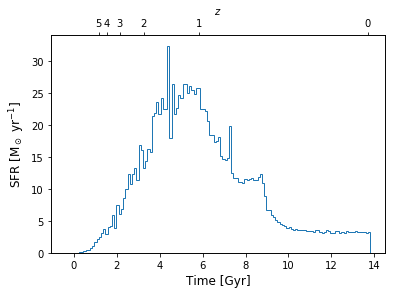

In [10]:
pynbody.plot.stars.sfh(halo1c, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 1c SFH')

plt.show()

In [27]:
print(data3['n_star'][data3['haloid'] == 1])
print(data3['n_gas'][data3['haloid'] == 1])
print(len(halo1c.dm))

0    17884441
Name: n_star, dtype: int64
0    3866079
Name: n_gas, dtype: int64
22824096


In [53]:
halo12 = h1.load_copy(12)

halo12.physical_units()

print(data1['n_star'][data1['haloid'] == 9])
print(data1['n_gas'][data1['haloid'] == 9])
print(len(halo12.dm))

6    47542
Name: n_star, dtype: int64
6    6629
Name: n_gas, dtype: int64
216584


In [54]:
pynbody.analysis.angmom.sideon(halo12)

/home/engelhar/anaconda3/lib/python3.7/site-packages/pynbody/plot/stars.py:74: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


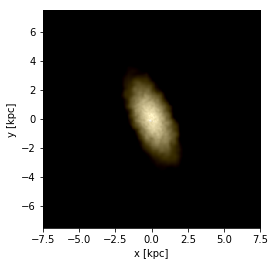

In [55]:
pynbody.plot.stars.render(halo12, width='15 kpc')
plt.savefig('Halo 12', dpi=300)
plt.show()

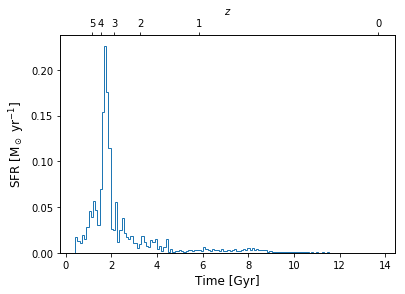

In [56]:
pynbody.plot.stars.sfh(halo12, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 12 SFH')

plt.show()

In [64]:
halo95 = h1.load_copy(95)

halo95.physical_units()

print(data1['n_star'][data1['haloid'] == 95])
print(data1['n_gas'][data1['haloid'] == 95])
print(len(halo12.dm))

45    32
Name: n_star, dtype: int64
45    402
Name: n_gas, dtype: int64
216584


In [61]:
pynbody.analysis.angmom.sideon(halo95)

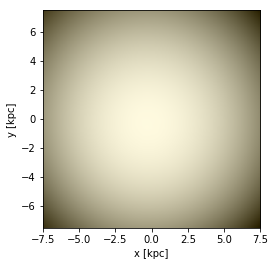

In [62]:
pynbody.plot.stars.render(halo95, width='15 kpc')
plt.savefig('Halo 95', dpi=300)
plt.show()

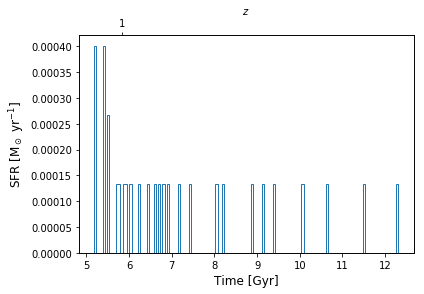

In [63]:
pynbody.plot.stars.sfh(halo95, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 95 SFH')

plt.show()

In [65]:
halo30 = h3.load_copy(30)
halo30 = h3.load_copy(30)/My Data Storage

halo30.physical_units()

print(data3['n_star'][data3['haloid'] == 30])
print(data3['n_gas'][data3['haloid'] == 30])
print(len(halo30.dm))
halo30.physical_units()

print(data3['n_star'][data3['haloid'] == 30])
print(data3['n_gas'][data3['haloid'] == 30])
print(len(halo30.dm))

9    9477
Name: n_star, dtype: int64
9    62535
Name: n_gas, dtype: int64
673


In [68]:
#pynbody.analysis.angmom.sideon(halo30)

In [ ]:
pynbody.plot.stars.render(halo30, width='15 kpc')
plt.savefig('Halo 30', dpi=300)
plt.show()

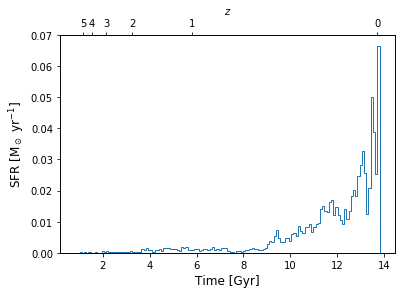

In [72]:
pynbody.plot.stars.sfh(halo30, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 30 SFH')

plt.show()

In [69]:
halo133 = h3.load_copy(133)

halo133.physical_units()

print(data3['n_star'][data3['haloid'] == 133])
print(data3['n_gas'][data3['haloid'] == 133])
print(len(halo133.dm))

29    3
Name: n_star, dtype: int64
29    355
Name: n_gas, dtype: int64
12488


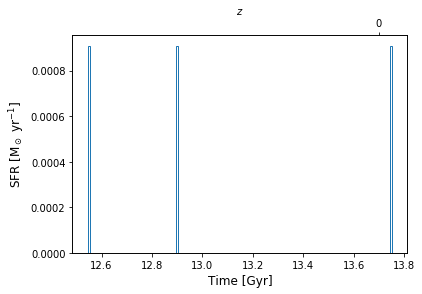

In [71]:
pynbody.plot.stars.sfh(halo133, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 133 SFH')

plt.show()